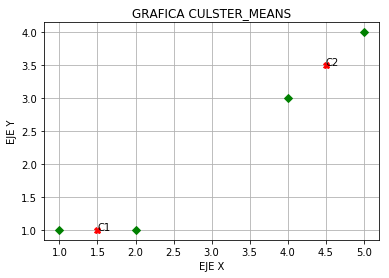

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Metodo cluter, tiene como parametros de entrada DATES y CENTROIDS
def cluster_means(dates, centroids):
  label = dates[0]
  tam_label = len(label)
  tam_centroids = len(centroids)
  matriz = np.zeros([tam_centroids,tam_label])
  vect = np.transpose(dates[1:])
  centroids_dict = {}
  for i in range(tam_centroids):
    centroids_dict.update({"c"+str(i+1):{"x":0,"y":0,"c":0}})
    centroid = centroids[i]
    for j in range(tam_label):
      aux = (centroid - vect[j]) ** 2
      plus = sum(aux)
      matriz[i,j] = (plus) ** (1/2)    
  matriz_aux = np.transpose(matriz)
  for i in range(len(matriz_aux)):
    point = matriz_aux[i]
    if point[0] < point[1]:
      matriz_aux[i][0] = 1
      matriz_aux[i][1] = 0
      centroids_dict["c1"]["c"] += 1
      centroids_dict["c1"]["x"] += vect[i,0]
      centroids_dict["c1"]["y"] += vect[i,1] 
    else:
      matriz_aux[i][0] = 0
      matriz_aux[i][1] = 1
      centroids_dict["c2"]["c"] += 1
      centroids_dict["c2"]["x"] += vect[i,0]
      centroids_dict["c2"]["y"] += vect[i,1] 
  new_centroid = [
      [centroids_dict["c1"]["x"]/centroids_dict["c1"]["c"],
       centroids_dict["c1"]["y"]/centroids_dict["c1"]["c"]],
      [centroids_dict["c2"]["x"]/centroids_dict["c2"]["c"],
       centroids_dict["c2"]["y"]/centroids_dict["c2"]["c"]]
  ]
  matriz_aux = np.transpose(matriz_aux)
  if centroids == new_centroid:
    for i in vect:
      plt.plot(i[0],i[1],"D",color="green")
    contate = 1
    for j in new_centroid:
      plt.plot(j[0],j[1],"X",color="red")
      plt.annotate("C{}".format(contate),j)
      contate += 1
    plt.grid()
    plt.xlabel("EJE X")
    plt.ylabel("EJE Y")
    plt.title("GRAFICA CULSTER_MEANS")
    plt.show()
    return None
  else:
    return cluster_means(dates, new_centroid)

#MENÚ
def play():
  dates = [["1","2","3","4"],
          [1,2,4,5],
           [1,1,3,4]]
  first_centroids = [[1,1], [2,1]]
  cluster_means(dates,first_centroids)
play()

CLUSTER con centroides

CLUSTER con jerarquia

In [1]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# Metodo cluster jerarquico con entrada DATES
def cluster(dates):
  label = dates[0]
  tam_label = len(label)
  matriz = np.zeros([tam_label,tam_label])
  result = np.transpose(dates[1:])
  for i in range(tam_label):
    aux = result[i]
    for j in range(i+1, tam_label):
      aux2 = abs(aux - result[j])
      plus = sum(aux2)
      matriz[j,i] = plus
  result = list(result)
  # Uso de TABULATE para mostrar con cabecera
  # 3 parametros?
  print(tabulate(matriz, headers=label, showindex=label),"\n\n     ITERACION\n  ")
  litt = np.where(matriz == np.max(matriz[np.nonzero(matriz)]))
  litt = (litt[1][0],litt[0][0])
  nlabel = label.pop(litt[0])
  nlabel += ""+label.pop(litt[1]-1)
  res1 = result.pop(litt[0])
  res2 = result.pop(litt[1]-1)
  n_result = (res1 + res2)/2
  label.insert(0, nlabel)
  result.insert(0, n_result)
  result = list(np.transpose(result))
  result.insert(0, label)
  if np.shape(matriz) == (2,2):
    return None
  else:
    return cluster(result)

# Menú
def play():
  dates = [["A","B","C","D","E"],
           [1,2,4,7,5],
           [1,1,5,7,7]]
  cluster(dates)
play()

      A    B    C    D    E
--  ---  ---  ---  ---  ---
A     0    0    0    0    0
B     1    0    0    0    0
C     7    6    0    0    0
D    12   11    5    0    0
E    10    9    3    2    0 

     ITERACION
  
      AD    B    C    E
--  ----  ---  ---  ---
AD     0    0    0    0
B      5    0    0    0
C      1    6    0    0
E      4    9    3    0 

     ITERACION
  
      BE    AD    C
--  ----  ----  ---
BE   0       0    0
AD   0.5     0    0
C    1.5     1    0 

     ITERACION
  
       BEC    AD
---  -----  ----
BEC   0        0
AD    0.75     0 

     ITERACION
  
